In [3]:
import pandas as pd
df = pd.read_csv('results_with_crew (1).csv')
df.head()

,tconst,primaryTitle,startYear,rank,averageRating,numVotes,runtimeMinutes,directors,writers,genres,IMDbLink,Title_IMDb_Link
0,tt0111161,The Shawshank Redemption,1994,1,9.3,3037371,142,Frank Darabont,"Stephen King, Frank Darabont",Drama,"<a href=""https://www.imdb.com/title/tt0111161""...","<a href=""https://www.imdb.com/title/tt0111161""..."
1,tt0068646,The Godfather,1972,2,9.2,2120255,175,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Crime, Drama","<a href=""https://www.imdb.com/title/tt0068646""...","<a href=""https://www.imdb.com/title/tt0068646""..."
2,tt0468569,The Dark Knight,2008,3,9.0,3014078,152,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...","Action, Crime, Drama","<a href=""https://www.imdb.com/title/tt0468569""...","<a href=""https://www.imdb.com/title/tt0468569""..."
3,tt0167260,The Lord of the Rings: The Return of the King,2003,4,9.0,2073900,201,Peter Jackson,"J.R.R. Tolkien, Fran Walsh, Philippa Boyens, P...","Adventure, Drama, Fantasy","<a href=""https://www.imdb.com/title/tt0167260""...","<a href=""https://www.imdb.com/title/tt0167260""..."
4,tt0108052,Schindler's List,1993,5,9.0,1519421,195,Steven Spielberg,"Thomas Keneally, Steven Zaillian","Biography, Drama, History","<a href=""https://www.imdb.com/title/tt0108052""...","<a href=""https://www.imdb.com/title/tt0108052""..."


In [5]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           5000 non-null   object 
 1   primaryTitle     5000 non-null   object 
 2   startYear        5000 non-null   int64  
 3   rank             5000 non-null   int64  
 4   averageRating    5000 non-null   float64
 5   numVotes         5000 non-null   int64  
 6   runtimeMinutes   5000 non-null   int64  
 7   directors        5000 non-null   object 
 8   writers          4974 non-null   object 
 9   genres           5000 non-null   object 
 10  IMDbLink         5000 non-null   object 
 11  Title_IMDb_Link  5000 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 468.9+ KB


tconst              0
primaryTitle        0
startYear           0
rank                0
averageRating       0
numVotes            0
runtimeMinutes      0
directors           0
writers            26
genres              0
IMDbLink            0
Title_IMDb_Link     0
dtype: int64

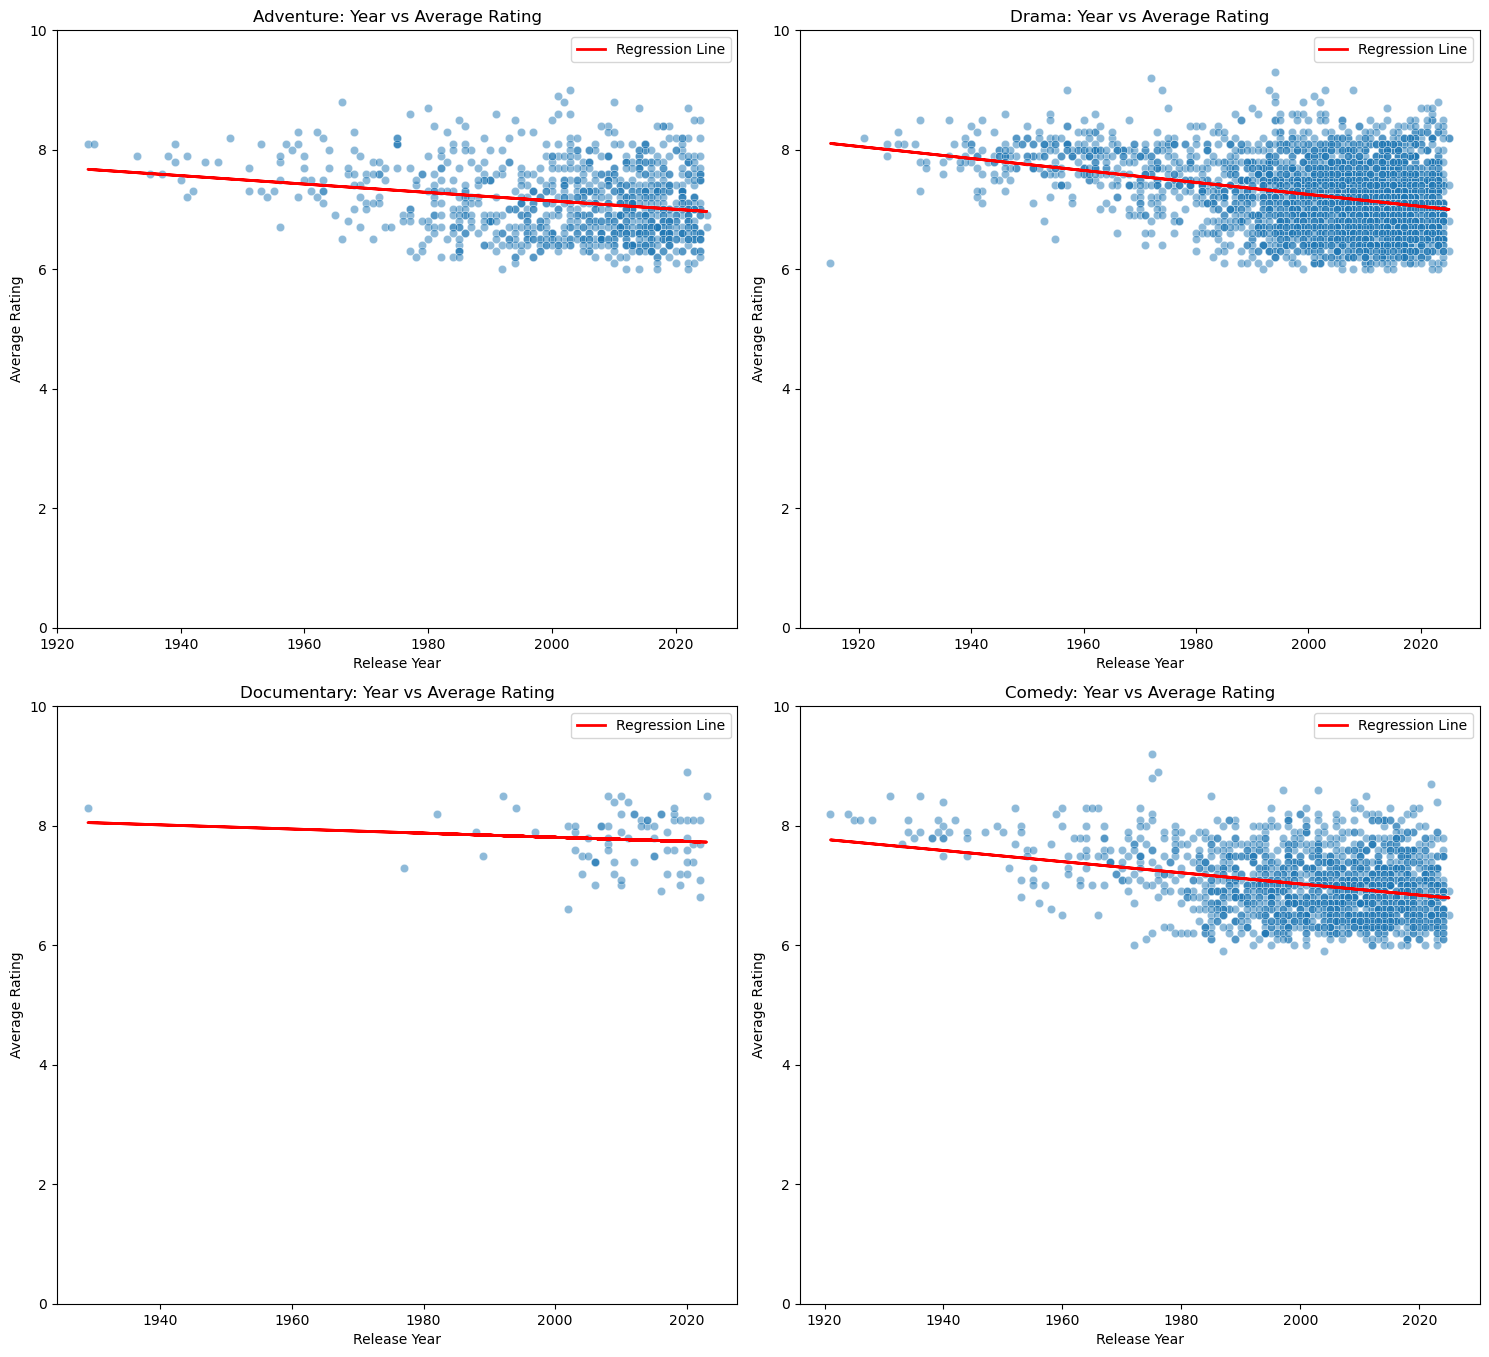

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np


df = pd.read_csv('results_with_crew (1).csv')

df = df.dropna(subset=['genres', 'startYear', 'averageRating'])


df['startYear'] = pd.to_numeric(df['startYear'], errors='coerce')
df = df.dropna(subset=['startYear'])
df['startYear'] = df['startYear'].astype(int)

df['genres'] = df['genres'].str.lower()

selected_genres = ['adventure', 'drama', 'documentary', 'comedy']

plt.figure(figsize=(15, 20))

for i, genre in enumerate(selected_genres):
    genre_df = df[df['genres'].str.contains(genre)]

    X = genre_df[['startYear']]
    y = genre_df['averageRating']

    if len(X) < 2:
        continue

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.subplot(3, 2, i+1)
    sns.scatterplot(x='startYear', y='averageRating', data=genre_df, alpha=0.5)
    plt.plot(genre_df['startYear'], y_pred, color='red', linewidth=2, label='Regression Line')
    plt.title(f'{genre.title()}: Year vs Average Rating')
    plt.xlabel('Release Year')
    plt.ylabel('Average Rating')
    plt.ylim(0, 10)
    plt.legend()

plt.tight_layout()
plt.show()

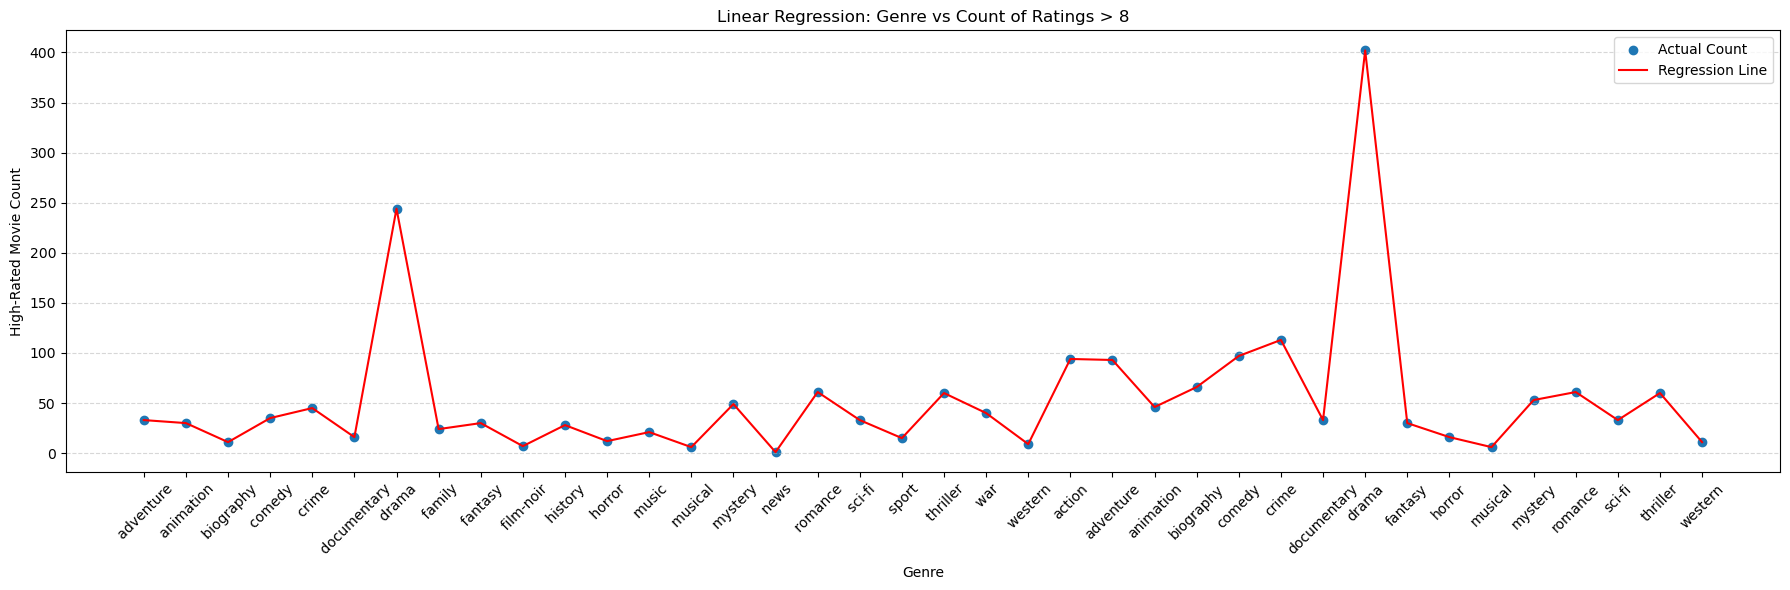

In [13]:
all_genres = set()
df['genres'].str.split(',').apply(all_genres.update)
all_genres = sorted(list(all_genres))

for genre in all_genres:
    df[genre] = df['genres'].apply(lambda x: int(genre in x))

df_high = df[df['averageRating'] >= 8]

genre_counts = {genre: df_high[genre].sum() for genre in all_genres}
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'HighRatedCount'])

X = pd.get_dummies(genre_counts_df['Genre'])
y = genre_counts_df['HighRatedCount']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(18, 6))
plt.scatter(genre_counts_df['Genre'], y, label='Actual Count')
plt.plot(genre_counts_df['Genre'], y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Genre vs Count of Ratings > 8')
plt.xlabel('Genre')
plt.ylabel('High-Rated Movie Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

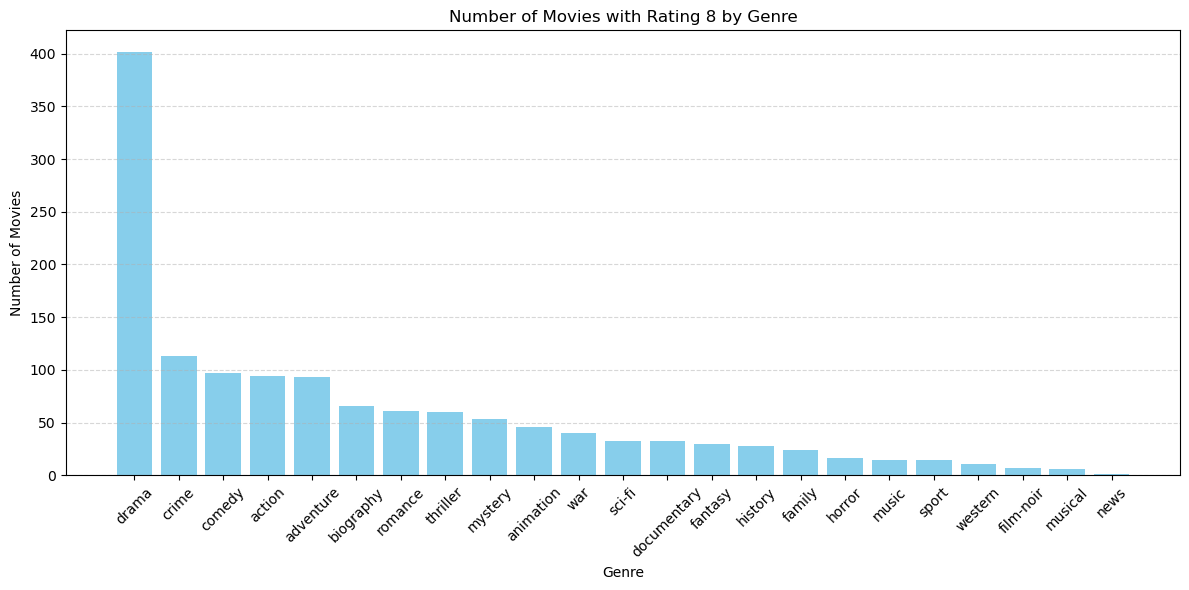

In [87]:
df = df.dropna(subset=['genres', 'averageRating'])

df['genres'] = df['genres'].str.lower()

df_8 = df[df['averageRating'] >= 8]

from collections import Counter

genre_counter = Counter()
for genres in df_8['genres']:
    for genre in genres.split(','):
        genre = genre.strip()
        genre_counter[genre] += 1

genre_counts_df = pd.DataFrame(genre_counter.items(), columns=['Genre', 'Count'])
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(genre_counts_df['Genre'], genre_counts_df['Count'], color='skyblue')
plt.title('Number of Movies with Rating 8 by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

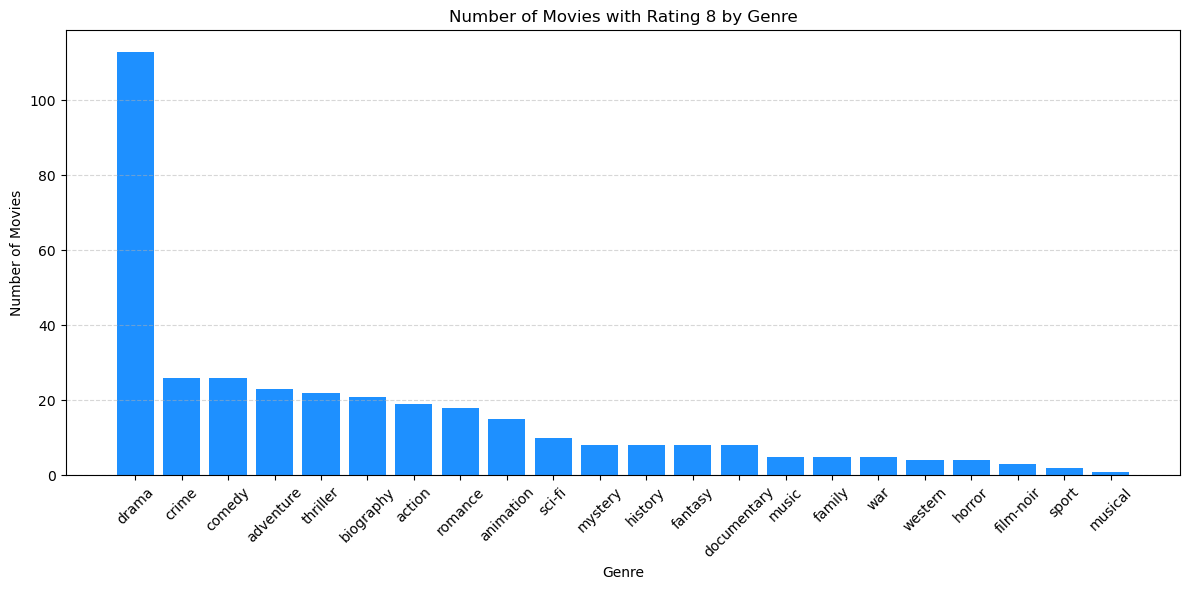

In [59]:
df = df.dropna(subset=['genres', 'averageRating'])
df['genres'] = df['genres'].str.lower()
df_8 = df[df['averageRating'] == 8]

genre_counter = Counter()
for genres in df_8['genres']:
    for genre in genres.split(','):
        genre_counter[genre.strip()] += 1

genre_counts_df = pd.DataFrame(genre_counter.items(), columns=['Genre', 'Count'])
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(genre_counts_df['Genre'], genre_counts_df['Count'], color='dodgerblue')
plt.title('Number of Movies with Rating 8 by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()